In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
data = pd.read_csv("C:/Users/Balu/Downloads/Company Bankruptcy/data.csv")

In [3]:
data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.shape

(6819, 96)

In [5]:
data.columns


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

*Borrowingdependency

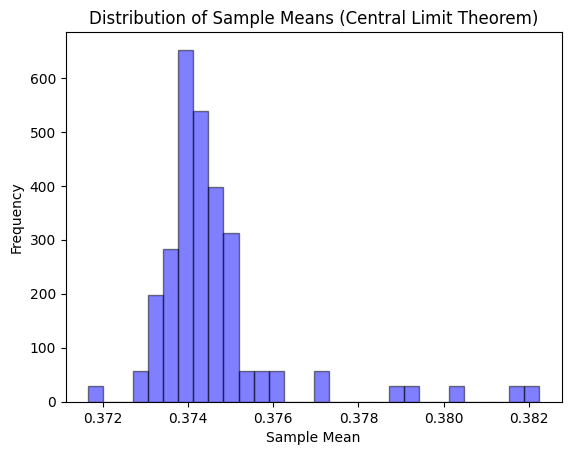

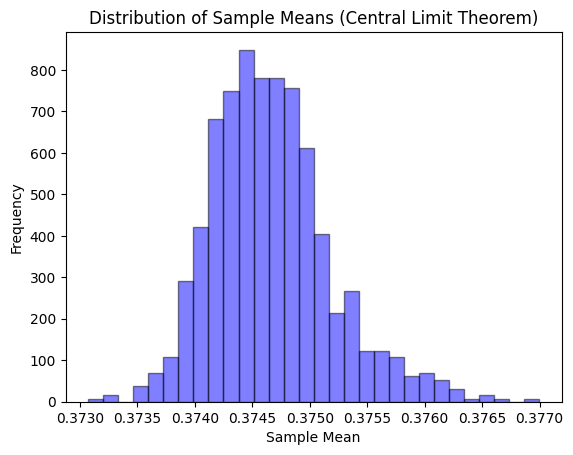

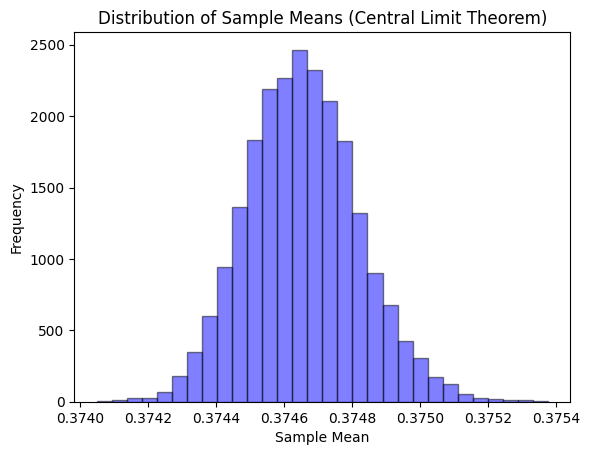

In [8]:
num_samples = 100  
sample_size = 100
for i in range(3):
     

    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data[' Borrowing dependency'], size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='b', edgecolor='black')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sample Means (Central Limit Theorem)')
    plt.show()
    num_samples*= 10  
    sample_size*= 10
    


*'Bankrupt?'

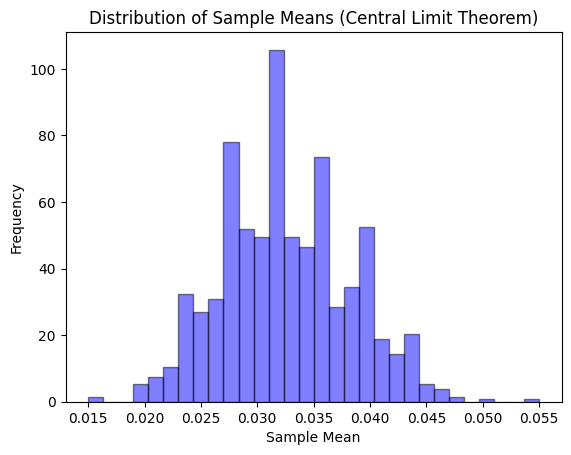

In [ ]:
num_samples = 1000 
sample_size = 1000  

sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(data['Bankrupt?'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.show()


## Hypothesis Testing

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df=data
# Separate the data into bankrupt and non-bankrupt groups
bankrupt_group = df[df['Bankrupt?'] == 1]
non_bankrupt_group = df[df['Bankrupt?'] == 0]

# List of columns to analyze
columns_to_analyze = [' Working Capital/Equity',' Net Value Growth Rate',' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',]

# Perform t-test for each variable
alpha = 0.05
significant_variables = []

for column in columns_to_analyze:
    t_stat, p_value = ttest_ind(bankrupt_group[column].dropna(), non_bankrupt_group[column].dropna())
    
    print(f'\nVariable: {column}\nT-statistic: {t_stat}\nP-value: {p_value}')

    if p_value < alpha:
        print("Reject the null hypothesis.")
        significant_variables.append(column)
    else:
        print("Fail to reject the null hypothesis")

print("\nVariables with significant differences between bankrupt and non-bankrupt groups:", significant_variables)




Variable:  Working Capital/Equity
T-statistic: -12.289217918191321
P-value: 2.3860802078866884e-34
Reject the null hypothesis.

Variable:  Net Value Growth Rate
T-statistic: 5.405479590397163
P-value: 6.682585147588889e-08
Reject the null hypothesis.

Variable:  Total debt/Total net worth
T-statistic: 1.0167498649919013
P-value: 0.30930852088474936
Fail to reject the null hypothesis

Variable:  Debt ratio %
T-statistic: 21.33286550706683
P-value: 8.373952513247568e-98
Reject the null hypothesis.

Variable:  Net worth/Assets
T-statistic: -21.332865507066867
P-value: 8.373952513241844e-98
Reject the null hypothesis.

Variables with significant differences between bankrupt and non-bankrupt groups: [' Working Capital/Equity', ' Net Value Growth Rate', ' Debt ratio %', ' Net worth/Assets']
